# 1.- Importacion de modulos e librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from google.cloud import bigquery


In [71]:
client = bigquery.Client()

# 2.- Carga de Datos


In [72]:
partidos_qatar2022="""
      SELECT * FROM `proyecto-final-bigdata.raw_data.partidos_qatar2022`
    """

historial_partidos="""
      SELECT * FROM `proyecto-final-bigdata.raw_data.historial_partidos`
    """
ranking_clasificados="""
      SELECT * FROM `proyecto-final-bigdata.raw_data.ranking_fifa_clasificados`
    """

partidos_qatar2022 = client.query(partidos_qatar2022).to_dataframe()
historial_partidos=client.query(historial_partidos).to_dataframe()
ranking_clasificados=client.query(ranking_clasificados).to_dataframe()
partidos_qatar2022.head()



,ronda,grupo,fecha,local,visitante,hora,estadio
0,1,A,"Mon, Nov. 21",Qatar,Ecuador,11 a.m.,Al Bayt Stadium
1,1,B,"Mon, Nov. 21",England,IR Iran,8 a.m.,Khalifa Int'l Stadium
2,1,B,"Mon, Nov. 21",USA,Wales,2 p.m.,Ahmad Bin Ali Stadium
3,1,C,"Tues, Nov. 22",Argentina,Saudi Arabia,5 a.m.,Lusail Stadium
4,1,C,"Tues, Nov. 22",Mexico,Poland,11 a.m.,Stadium 974


In [73]:
partidos_qatar2022.head()

,ronda,grupo,fecha,local,visitante,hora,estadio
0,1,A,"Mon, Nov. 21",Qatar,Ecuador,11 a.m.,Al Bayt Stadium
1,1,B,"Mon, Nov. 21",England,IR Iran,8 a.m.,Khalifa Int'l Stadium
2,1,B,"Mon, Nov. 21",USA,Wales,2 p.m.,Ahmad Bin Ali Stadium
3,1,C,"Tues, Nov. 22",Argentina,Saudi Arabia,5 a.m.,Lusail Stadium
4,1,C,"Tues, Nov. 22",Mexico,Poland,11 a.m.,Stadium 974


In [74]:
historial_partidos.head()

,fecha,equipo_local,equipo_visitante,goles_local,goles_visita,torneo,ciudad,pais,neutral
0,1966-11-25,Palestine,Yemen,5,3,GaNEFo,Phnom Penh,Cambodia,True
1,1966-11-26,Cambodia,North Korea,0,2,GaNEFo,Phnom Penh,Cambodia,False
2,1966-11-26,China PR,Palestine,7,0,GaNEFo,Phnom Penh,Cambodia,True
3,1966-11-26,North Vietnam,Yemen,9,0,GaNEFo,Phnom Penh,Cambodia,True
4,1966-11-27,Cambodia,China PR,0,4,GaNEFo,Phnom Penh,Cambodia,False


In [75]:
ranking_clasificados.head()

,posicion,equipo,puntos
0,29,Korea Republic,1519.54
1,39,Scotland,1472.66
2,62,North Macedonia,1381.07
3,195,Cayman Islands,873.64
4,43,Turkey,1461.81


# 3.- Analisis Exploratorio de Datos


## 3.1 Renombrar columnas al español

In [11]:
partidos_qatar2022=partidos_qatar2022.rename(columns={"Round":"ronda","Group":"grupo","Date":"fecha","Home":"local","Away":"visitante"," Time (ET)":"hora","Staduim":"estadio"})
historial_partidos=historial_partidos.rename(columns={"date":"fecha","home_team":"equipo_local","away_team":"equipo_visitante","home_score":"goles_local","away_score":"goles_visita","tournament":"torneo","city":"ciudad","country":"pais","Staduim":"estadio"})
ranking_clasificados=ranking_clasificados.rename(columns={"RK":"posicion","Team":"equipo","Points":"puntos"})
ranking_clasificados.head()

,posicion,equipo,puntos
0,29,Korea Republic,1519.54
1,39,Scotland,1472.66
2,62,North Macedonia,1381.07
3,195,Cayman Islands,873.64
4,43,Turkey,1461.81


In [12]:
#!pip install googletrans

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 9.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=b46ce7385347a7abcd3338cb05a81992fae390d46e3099fdfb341c27c4bd841a
  Stored in directory: /home/jupyter/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uni

In [13]:
partidos_qatar2022.head(20)

,ronda,grupo,fecha,local,visitante,hora,estadio
0,1,A,"Mon, Nov. 21",Qatar,Ecuador,11 a.m.,Al Bayt Stadium
1,1,B,"Mon, Nov. 21",England,IR Iran,8 a.m.,Khalifa Int'l Stadium
2,1,B,"Mon, Nov. 21",USA,Wales,2 p.m.,Ahmad Bin Ali Stadium
3,1,C,"Tues, Nov. 22",Argentina,Saudi Arabia,5 a.m.,Lusail Stadium
4,1,C,"Tues, Nov. 22",Mexico,Poland,11 a.m.,Stadium 974
5,1,D,"Tue, Nov. 22",Denmark,Tunisia,8 a.m.,Education City Stadium
6,1,D,"Tue, Nov. 22",France,Australia,2 p.m.,Al Janoub Stadium
7,1,E,"Wed, Nov. 23",Germany,Japan,8 a.m.,Khalifa Int'l
8,1,E,"Wed, Nov. 23",Spain,Costa Rica,11 a.m.,Al Thumama
9,1,F,"Wed, Nov. 23",Morocco,Croatia,5 a.m.,Al Bayt


## 3.2 Definir el ganador del encuentro
Este proceso se realiza teniendo en cuenta los goles anotados por cada equipo

In [14]:
ganador = []
for i in range (len(historial_partidos['equipo_local'])):
    if historial_partidos ['goles_local'][i] > historial_partidos['goles_visita'][i]:
        ganador.append(historial_partidos['equipo_local'][i])
    elif historial_partidos['goles_local'][i] < historial_partidos ['goles_visita'][i]:
        ganador.append(historial_partidos['equipo_visitante'][i])
    else:
        ganador.append('empate')
historial_partidos['equipo_ganador'] = ganador

In [15]:
historial_partidos.head()

,fecha,equipo_local,equipo_visitante,goles_local,goles_visita,torneo,ciudad,pais,neutral,equipo_ganador
0,1966-11-25,Palestine,Yemen,5,3,GaNEFo,Phnom Penh,Cambodia,True,Palestine
1,1966-11-26,Cambodia,North Korea,0,2,GaNEFo,Phnom Penh,Cambodia,False,North Korea
2,1966-11-26,China PR,Palestine,7,0,GaNEFo,Phnom Penh,Cambodia,True,China PR
3,1966-11-26,North Vietnam,Yemen,9,0,GaNEFo,Phnom Penh,Cambodia,True,North Vietnam
4,1966-11-27,Cambodia,China PR,0,4,GaNEFo,Phnom Penh,Cambodia,False,China PR


## 3.3 Extraccion del historial de partidos desde 1930
¿por qué 1930?: A partir de ese año se empezaron a jugar los mundiales de futbol

In [16]:
#Creamos un dataframe con todos los partidos jugados por inglaterra, ya sea de local o de visita
df = historial_partidos[(historial_partidos['equipo_local'] == 'England') | (historial_partidos['equipo_visitante'] == 'England')]
England = df.iloc[:]
England.head()


,fecha,equipo_local,equipo_visitante,goles_local,goles_visita,torneo,ciudad,pais,neutral,equipo_ganador
41,1993-06-19,England,Germany,1,2,USA Cup,Pontiac,United States,True,Germany
52,1993-06-09,United States,England,2,0,USA Cup,Foxborough,United States,False,United States
60,1993-06-13,Brazil,England,1,1,USA Cup,Washington,United States,True,empate
402,2009-11-14,Brazil,England,1,0,Friendly,Doha,Qatar,True,Brazil
504,2004-02-18,Portugal,England,1,1,Friendly,Faro,Portugal,False,empate


In [17]:
# Proceso de extracción de los partidos jugados por inglaterra desde 1930
year = []
for row in England['fecha']:
    year.append(int(row[:4]))
England ['anio_partido']= year
England_1930 = England[England.anio_partido >= 1930]
England_1930.count()

fecha               867
equipo_local        867
equipo_visitante    867
goles_local         867
goles_visita        867
torneo              867
ciudad              867
pais                867
neutral             867
equipo_ganador      867
anio_partido        867
dtype: int64

In [18]:
England_1930.head(9)

,fecha,equipo_local,equipo_visitante,goles_local,goles_visita,torneo,ciudad,pais,neutral,equipo_ganador,anio_partido
41,1993-06-19,England,Germany,1,2,USA Cup,Pontiac,United States,True,Germany,1993
52,1993-06-09,United States,England,2,0,USA Cup,Foxborough,United States,False,United States,1993
60,1993-06-13,Brazil,England,1,1,USA Cup,Washington,United States,True,empate,1993
402,2009-11-14,Brazil,England,1,0,Friendly,Doha,Qatar,True,Brazil,2009
504,2004-02-18,Portugal,England,1,1,Friendly,Faro,Portugal,False,empate,2004
542,2010-05-30,Japan,England,1,2,Friendly,Graz,Austria,True,England,2010
563,2002-05-26,Cameroon,England,2,2,Friendly,Kobe,Japan,True,empate,2002
615,1959-05-17,Peru,England,4,1,Friendly,Lima,Peru,False,Peru,1959
617,1962-05-20,Peru,England,0,4,Friendly,Lima,Peru,False,England,1962


### A. Extracción del historial solo de los paises clasificados

In [19]:
# Filtraremos solo los paises clasificados
equipos_copamundial = ['Senegal', ' Netherlands', 'Qatar', 'Ecuador', 
            'England', 'Iran', 'United States', 'Wales', 
            'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 
            'Denmark', 'Tunisia', 'France', 'Australia', 
            'Germany', 'Japan', 'Spain', 'Costa Rica', 
            'Morocco', 'Croatia', 'Belgium', 'Canada', 
            'Switzerland', 'Cameroon', 'Brazil', 'Serbia', 
            'Uruguay', 'South Korea', 'Portugal', 'Ghana']
df_equipos_local = historial_partidos[historial_partidos['equipo_local'].isin(equipos_copamundial)]
df_equipos_visitantes = historial_partidos[historial_partidos['equipo_visitante'].isin(equipos_copamundial)]
df_equipos= pd.concat((df_equipos_local, df_equipos_visitantes))
df_equipos.drop_duplicates()
df_equipos.count()

fecha               21592
equipo_local        21592
equipo_visitante    21592
goles_local         21592
goles_visita        21592
torneo              21592
ciudad              21592
pais                21592
neutral             21592
equipo_ganador      21592
dtype: int64

In [20]:
df_equipos

,fecha,equipo_local,equipo_visitante,goles_local,goles_visita,torneo,ciudad,pais,neutral,equipo_ganador
30,2013-09-05,Saudi Arabia,New Zealand,0,1,OSN Cup,Riyadh,Saudi Arabia,False,New Zealand
32,2013-09-09,Saudi Arabia,Trinidad and Tobago,1,3,OSN Cup,Riyadh,Saudi Arabia,False,Trinidad and Tobago
34,1995-06-24,Mexico,Nigeria,2,1,USA Cup,Dallas,United States,True,Mexico
35,1996-06-08,Mexico,Bolivia,1,0,USA Cup,Dallas,United States,True,Mexico
36,2000-06-07,Mexico,South Africa,4,2,USA Cup,Dallas,United States,True,Mexico
...,...,...,...,...,...,...,...,...,...,...
43180,1982-07-23,China PR,Morocco,3,3,Beijing International Friendship Tournament,Beijing,China PR,False,empate
43181,1982-07-25,Hong Kong,Morocco,0,0,Beijing International Friendship Tournament,Beijing,China PR,True,empate
43183,1980-06-09,Hong Kong,Japan,1,3,Guangzhou International Friendship Tournament,Guangzhou,China PR,True,Japan
43184,1980-06-11,China PR,Japan,1,0,Guangzhou International Friendship Tournament,Guangzhou,China PR,False,China PR


In [21]:
# Filtramos todos los partidos de los clasificados a partir de 1930. Al resto, los eliminamos.
anio = []
for row in df_equipos['fecha']:
    anio.append(int(row[:4]))
df_equipos['anio_partido'] = anio
df_equipos_1930 = df_equipos[df_equipos.anio_partido >= 1930]
df_equipos_1930.head()

,fecha,equipo_local,equipo_visitante,goles_local,goles_visita,torneo,ciudad,pais,neutral,equipo_ganador,anio_partido
30,2013-09-05,Saudi Arabia,New Zealand,0,1,OSN Cup,Riyadh,Saudi Arabia,False,New Zealand,2013
32,2013-09-09,Saudi Arabia,Trinidad and Tobago,1,3,OSN Cup,Riyadh,Saudi Arabia,False,Trinidad and Tobago,2013
34,1995-06-24,Mexico,Nigeria,2,1,USA Cup,Dallas,United States,True,Mexico,1995
35,1996-06-08,Mexico,Bolivia,1,0,USA Cup,Dallas,United States,True,Mexico,1996
36,2000-06-07,Mexico,South Africa,4,2,USA Cup,Dallas,United States,True,Mexico,2000


## 3.4 Eliminación de campos que no suman relevancia al modelo

In [22]:
df_equipos_1930 = df_equipos.drop(['fecha', 'ciudad', 'pais','neutral',"anio_partido"], axis=1)
df_equipos_1930.head()

,equipo_local,equipo_visitante,goles_local,goles_visita,torneo,equipo_ganador
30,Saudi Arabia,New Zealand,0,1,OSN Cup,New Zealand
32,Saudi Arabia,Trinidad and Tobago,1,3,OSN Cup,Trinidad and Tobago
34,Mexico,Nigeria,2,1,USA Cup,Mexico
35,Mexico,Bolivia,1,0,USA Cup,Mexico
36,Mexico,South Africa,4,2,USA Cup,Mexico


## 3.5 Agregación y Modificación de caracteristicas

### A. Re-Categorizar el torneo jugado
Este proceso se hizo teniendo en cuenta lo siguiente:
1. Si el torneo fue amistoso (pueden que no lo tomen en serio el partido): ```0```
2. Si el torneo no fue amistoso (puede que si lo tomen en serio el partido): ```1```





In [23]:
print(df_equipos_1930['torneo'].unique())

['OSN Cup' 'USA Cup' 'Arab Cup' 'Friendly' 'Gold Cup' 'Gulf Cup'
 'Rous Cup' 'Copa Roca' 'Kirin Cup' 'Korea Cup' 'Nehru Cup' 'UDEAC Cup'
 'UEFA Euro' 'UNCAF Cup' 'Balkan Cup' 'COSAFA Cup' "King's Cup"
 'Mundialito' 'Copa Lipton' 'Copa Newton' 'Dynasty Cup' 'Merlion Cup'
 'Nations Cup' 'Atlantic Cup' 'Copa Artigas' 'Matthews Cup'
 'AFC Asian Cup' 'Copa América' 'Palestine Cup' 'FIFA World Cup'
 'Millennium Cup' 'Copa Rio Branco' 'Bolivarian Games' 'Dakar Tournament'
 'Simba Tournament' 'West African Cup' 'CCCF Championship'
 'Copa Oswaldo Cruz' 'EAFF Championship' 'International Cup'
 'NAFU Championship' 'Tournoi de France' 'WAFF Championship'
 'Confederations Cup' 'Copa Félix Bogado' 'Lunar New Year Cup'
 'Merdeka Tournament' 'Amílcar Cabral Cup' 'Nordic Championship'
 'Oceania Nations Cup' 'UEFA Nations League' 'British Championship'
 'Copa Carlos Dittborn' 'Copa Ramón Castilla' 'Indonesia Tournament'
 'CONCACAF Championship' 'African Cup of Nations' 'Copa Juan Pinto Durán'
 'Gold Cup

In [24]:
def convertir_torneo(torneo):
  """" Esta función convierte la categoría torneo en base a: amistoso (0), otro torneo (1)"""
  if torneo=="Friendly":
    return 0
  else:
    return 1
df_equipos_1930["torneo"]=df_equipos_1930["torneo"].apply(lambda x: convertir_torneo(x))


### B. Crear la categoría diferencia de goles

In [25]:
def diferencia_goles(goles_local,goles_visita,equipo_ganador):
  """ Esta Función extrae la diferencia de goles del ganador con relación al perdedor"""
  if equipo_ganador == 2:
    return (goles_local-goles_visita)
  elif equipo_ganador==0:
    return (goles_visita-goles_local)
  else:
    return 0

df_equipos_1930["diferencia_goles"]=df_equipos_1930.apply(lambda x: diferencia_goles(x["goles_local"],x["goles_visita"],x["equipo_ganador"]),axis=1)


### C. Eliminamos Goles local con goles visita

In [26]:
df_equipos_1930 = df_equipos_1930.drop(['goles_local', 'goles_visita'], axis=1)
df_equipos_1930.head()

,equipo_local,equipo_visitante,torneo,equipo_ganador,diferencia_goles
30,Saudi Arabia,New Zealand,1,New Zealand,0
32,Saudi Arabia,Trinidad and Tobago,1,Trinidad and Tobago,0
34,Mexico,Nigeria,1,Mexico,0
35,Mexico,Bolivia,1,Mexico,0
36,Mexico,South Africa,1,Mexico,0


## 3.6 Creación de la clase (Label) para cada registro
Criterio
1. Si ganó el equipo local: 2
2. Si empataron: 1
3. Si ganó el equipo visitante: 0

In [27]:
df_equipos_1930 = df_equipos_1930.reset_index(drop=True)
df_equipos_1930.loc[df_equipos_1930.equipo_ganador == df_equipos_1930.equipo_local,'equipo_ganador']=2
df_equipos_1930.loc[df_equipos_1930.equipo_ganador == 'empate', 'equipo_ganador']=1
df_equipos_1930.loc[df_equipos_1930.equipo_ganador == df_equipos_1930.equipo_visitante, 'equipo_ganador']=0

In [28]:
df_equipos_1930.head()

,equipo_local,equipo_visitante,torneo,equipo_ganador,diferencia_goles
0,Saudi Arabia,New Zealand,1,0,0
1,Saudi Arabia,Trinidad and Tobago,1,0,0
2,Mexico,Nigeria,1,2,0
3,Mexico,Bolivia,1,2,0
4,Mexico,South Africa,1,2,0


## 3.7 Estandarización de datos
En este caso solo estandarizaremos la diferencia de goles

In [29]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
df_equipos_1930["diferencia_goles"]=scaler.fit_transform(df_equipos_1930[['diferencia_goles']])
df_equipos_1930.head()

,equipo_local,equipo_visitante,torneo,equipo_ganador,diferencia_goles
0,Saudi Arabia,New Zealand,1,0,0.0
1,Saudi Arabia,Trinidad and Tobago,1,0,0.0
2,Mexico,Nigeria,1,2,0.0
3,Mexico,Bolivia,1,2,0.0
4,Mexico,South Africa,1,2,0.0


## 3.8 Creamos el One-Hot Encoding para las variables categoricas (Equipo_local,equipo_visitante)

In [30]:
# convertimos los equipos locales y los equipos visitantes en variables numéricas utilizando el dummy
final = pd.get_dummies(df_equipos_1930, prefix=['equipo_local', 'equipo_visitante'], columns=['equipo_local', 'equipo_visitante'])

In [31]:
final.head()

,torneo,equipo_ganador,diferencia_goles,equipo_local_Afghanistan,equipo_local_Albania,equipo_local_Algeria,equipo_local_Andalusia,equipo_local_Andorra,equipo_local_Angola,equipo_local_Antigua and Barbuda,...,equipo_visitante_Venezuela,equipo_visitante_Vietnam,equipo_visitante_Vietnam Republic,equipo_visitante_Wales,equipo_visitante_Western Australia,equipo_visitante_Yemen,equipo_visitante_Yemen DPR,equipo_visitante_Yugoslavia,equipo_visitante_Zambia,equipo_visitante_Zimbabwe
0,1,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4.- Modelado

## 4.1 Separación de clase y caracteristicas

In [32]:
# Separamos los valores de X y Y
X = final.drop(['equipo_ganador'], axis=1)
y = final["equipo_ganador"]
y = y.astype('int')

## 4.2 Separación de datos de Entrenamiento y prueba

In [33]:
# Separamos los valores de Entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [34]:
final.head()

,torneo,equipo_ganador,diferencia_goles,equipo_local_Afghanistan,equipo_local_Albania,equipo_local_Algeria,equipo_local_Andalusia,equipo_local_Andorra,equipo_local_Angola,equipo_local_Antigua and Barbuda,...,equipo_visitante_Venezuela,equipo_visitante_Vietnam,equipo_visitante_Vietnam Republic,equipo_visitante_Wales,equipo_visitante_Western Australia,equipo_visitante_Yemen,equipo_visitante_Yemen DPR,equipo_visitante_Yugoslavia,equipo_visitante_Zambia,equipo_visitante_Zimbabwe
0,1,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4.3 Entrenamiento del Modelo

In [36]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [35]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.582
Test set accuracy:  0.562


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [37]:
X, y = make_classification(random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data. # revisar 

0.5609756097560976

In [38]:
#adding Fifa rankings
#the team which is positioned higher on the FIFA Ranking will be considered "favourite" for the match
#and therefore, will be positioned under the "home_teams" column
#since there are no "home" or "away" teams in World Cup games. 

# 5.- Predicción

## 5.1 Cargamos los datasets de los partidos y los Ranking FIFA

In [39]:
partidos_qatar2022.head()

,ronda,grupo,fecha,local,visitante,hora,estadio
0,1,A,"Mon, Nov. 21",Qatar,Ecuador,11 a.m.,Al Bayt Stadium
1,1,B,"Mon, Nov. 21",England,IR Iran,8 a.m.,Khalifa Int'l Stadium
2,1,B,"Mon, Nov. 21",USA,Wales,2 p.m.,Ahmad Bin Ali Stadium
3,1,C,"Tues, Nov. 22",Argentina,Saudi Arabia,5 a.m.,Lusail Stadium
4,1,C,"Tues, Nov. 22",Mexico,Poland,11 a.m.,Stadium 974


In [40]:
ranking_clasificados.head()

,posicion,equipo,puntos
0,29,Korea Republic,1519.54
1,39,Scotland,1472.66
2,62,North Macedonia,1381.07
3,195,Cayman Islands,873.64
4,43,Turkey,1461.81


## 5.2 Añadimos los rankings FIFA del equipo local y el equipo visitante

In [41]:
# Lista de los partidos en la fase de grupos
pred_set = []

In [42]:

# Creamos una nueva columna con los ranquins de cada equipo
partidos_qatar2022.insert(1, 'ranking_local', partidos_qatar2022['local'].map(ranking_clasificados.set_index('equipo')['posicion']))
partidos_qatar2022.insert(2, 'ranking_visita', partidos_qatar2022['visitante'].map(ranking_clasificados.set_index('equipo')['posicion']))

# Solo necesitamos aquellos equipos clasificados a Qatar2022 y los que jugarán la primera Ronda (48 partidos)
partidos_qatar2022 = partidos_qatar2022.iloc[:48, :]
partidos_qatar2022.head()

,ronda,ranking_local,ranking_visita,grupo,fecha,local,visitante,hora,estadio
0,1,51.0,46.0,A,"Mon, Nov. 21",Qatar,Ecuador,11 a.m.,Al Bayt Stadium
1,1,5.0,21.0,B,"Mon, Nov. 21",England,IR Iran,8 a.m.,Khalifa Int'l Stadium
2,1,15.0,18.0,B,"Mon, Nov. 21",USA,Wales,2 p.m.,Ahmad Bin Ali Stadium
3,1,4.0,49.0,C,"Tues, Nov. 22",Argentina,Saudi Arabia,5 a.m.,Lusail Stadium
4,1,9.0,26.0,C,"Tues, Nov. 22",Mexico,Poland,11 a.m.,Stadium 974


In [43]:
partidos_qatar2022.head()

,ronda,ranking_local,ranking_visita,grupo,fecha,local,visitante,hora,estadio
0,1,51.0,46.0,A,"Mon, Nov. 21",Qatar,Ecuador,11 a.m.,Al Bayt Stadium
1,1,5.0,21.0,B,"Mon, Nov. 21",England,IR Iran,8 a.m.,Khalifa Int'l Stadium
2,1,15.0,18.0,B,"Mon, Nov. 21",USA,Wales,2 p.m.,Ahmad Bin Ali Stadium
3,1,4.0,49.0,C,"Tues, Nov. 22",Argentina,Saudi Arabia,5 a.m.,Lusail Stadium
4,1,9.0,26.0,C,"Tues, Nov. 22",Mexico,Poland,11 a.m.,Stadium 974


## 5.3 Definicion del equipo Local y Visitante en base al Ranking Fifa

In [44]:
for index, row in partidos_qatar2022.iterrows():
    if row['ranking_local'] < row['ranking_visita']:
        pred_set.append({'equipo_local': row['local'], 'equipo_visitante': row['visitante'], 'equipo_ganador': None})
    else:
        pred_set.append({'equipo_local': row['visitante'], 'equipo_visitante': row['local'], 'equipo_ganador': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set
pred_set.head(16)

,equipo_local,equipo_visitante,equipo_ganador
0,Ecuador,Qatar,None
1,England,IR Iran,None
2,USA,Wales,None
3,Argentina,Saudi Arabia,None
4,Mexico,Poland,None
5,Denmark,Tunisia,None
6,France,Australia,None
7,Germany,Japan,None
8,Spain,Costa Rica,None
9,Croatia,Morocco,None


In [45]:
backup_pred_set.head()

,equipo_local,equipo_visitante,equipo_ganador
0,Ecuador,Qatar,None
1,England,IR Iran,None
2,USA,Wales,None
3,Argentina,Saudi Arabia,None
4,Mexico,Poland,None


## 5.4 Añadimos Tipo de Torneo 
Añadimos el tipo de torneo para cada partido (1 por no ser un amistoso) y la diferencia de goles (0.242359 por que es la media estandarizada al empatar un partido)

In [46]:
pred_set.insert(0, 'torneo', 1)
pred_set.insert(2, 'diferencia_goles', 0.242359)

In [47]:
pred_set.head()

,torneo,equipo_local,diferencia_goles,equipo_visitante,equipo_ganador
0,1,Ecuador,0.242359,Qatar,None
1,1,England,0.242359,IR Iran,None
2,1,USA,0.242359,Wales,None
3,1,Argentina,0.242359,Saudi Arabia,None
4,1,Mexico,0.242359,Poland,None


## 5.5 Creamos la representación One-hot Encoding para cada caracteristica cualitativa (equipos)

In [48]:
pred_set = pd.get_dummies(pred_set, prefix=['equipo_local', 'equipo_visitante'], columns=['equipo_local', 'equipo_visitante'])

In [49]:
pred_set.head()

,torneo,diferencia_goles,equipo_ganador,equipo_local_2B,equipo_local_Argentina,equipo_local_Belgium,equipo_local_Brazil,equipo_local_Croatia,equipo_local_Denmark,equipo_local_Ecuador,...,equipo_visitante_Poland,equipo_visitante_Qatar,equipo_visitante_Saudi Arabia,equipo_visitante_Serbia,equipo_visitante_South Korea,equipo_visitante_Switzerland,equipo_visitante_Tunisia,equipo_visitante_USA,equipo_visitante_Uruguay,equipo_visitante_Wales
0,1,0.242359,None,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,0.242359,None,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.242359,None,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0.242359,None,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0.242359,None,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [50]:
final.head()

,torneo,equipo_ganador,diferencia_goles,equipo_local_Afghanistan,equipo_local_Albania,equipo_local_Algeria,equipo_local_Andalusia,equipo_local_Andorra,equipo_local_Angola,equipo_local_Antigua and Barbuda,...,equipo_visitante_Venezuela,equipo_visitante_Vietnam,equipo_visitante_Vietnam Republic,equipo_visitante_Wales,equipo_visitante_Western Australia,equipo_visitante_Yemen,equipo_visitante_Yemen DPR,equipo_visitante_Yugoslavia,equipo_visitante_Zambia,equipo_visitante_Zimbabwe
0,1,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5.6 Adición de equipos no clasificados
Se añaden al dataset los equipos no clasificados pero todos tendrán un valor de cero(0) por que no jugarán ningun partido.

In [51]:
## extraemos a todos los que no han clasificado
missing_cols = set(final.columns) - set(pred_set.columns)
missing_cols

{'equipo_local_Afghanistan',
 'equipo_local_Albania',
 'equipo_local_Algeria',
 'equipo_local_Andalusia',
 'equipo_local_Andorra',
 'equipo_local_Angola',
 'equipo_local_Antigua and Barbuda',
 'equipo_local_Armenia',
 'equipo_local_Aruba',
 'equipo_local_Australia',
 'equipo_local_Austria',
 'equipo_local_Azerbaijan',
 'equipo_local_Bahrain',
 'equipo_local_Bangladesh',
 'equipo_local_Barbados',
 'equipo_local_Basque Country',
 'equipo_local_Belarus',
 'equipo_local_Belize',
 'equipo_local_Benin',
 'equipo_local_Bermuda',
 'equipo_local_Bhutan',
 'equipo_local_Bolivia',
 'equipo_local_Bosnia and Herzegovina',
 'equipo_local_Botswana',
 'equipo_local_Brittany',
 'equipo_local_Brunei',
 'equipo_local_Bulgaria',
 'equipo_local_Burkina Faso',
 'equipo_local_Burundi',
 'equipo_local_Cambodia',
 'equipo_local_Cameroon',
 'equipo_local_Canada',
 'equipo_local_Cape Verde',
 'equipo_local_Catalonia',
 'equipo_local_Cayman Islands',
 'equipo_local_Central African Republic',
 'equipo_local_Chad',

`aquellos equipos que no clasificaron les pondremos en los clasificados pero con valor 0, esto significa que no jugarán ningun partido`

In [59]:
# Agregar columnas faltantes en comparación con el conjunto de datos de entrenamiento del modelo
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

# Eliminar la columna de equipo ganador
pred_set = pred_set.drop(['equipo_ganador'], axis=1)

pred_set.head()

KeyError: "['equipo_ganador'] not in index"

In [53]:
pred_set["equipo_visitante_Zambia"]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
Name: equipo_visitante_Zambia, dtype: int64

In [54]:
len(pred_set.columns)

434

In [55]:
pred_set[pred_set["equipo_local_Wales"]==1]

,torneo,diferencia_goles,equipo_local_Afghanistan,equipo_local_Albania,equipo_local_Algeria,equipo_local_Andalusia,equipo_local_Andorra,equipo_local_Angola,equipo_local_Antigua and Barbuda,equipo_local_Argentina,...,equipo_visitante_Venezuela,equipo_visitante_Vietnam,equipo_visitante_Vietnam Republic,equipo_visitante_Wales,equipo_visitante_Western Australia,equipo_visitante_Yemen,equipo_visitante_Yemen DPR,equipo_visitante_Yugoslavia,equipo_visitante_Zambia,equipo_visitante_Zimbabwe
17,1,0.242359,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
partidos_qatar2022.head()

,ronda,ranking_local,ranking_visita,grupo,fecha,local,visitante,hora,estadio
0,1,51.0,46.0,A,"Mon, Nov. 21",Qatar,Ecuador,11 a.m.,Al Bayt Stadium
1,1,5.0,21.0,B,"Mon, Nov. 21",England,IR Iran,8 a.m.,Khalifa Int'l Stadium
2,1,15.0,18.0,B,"Mon, Nov. 21",USA,Wales,2 p.m.,Ahmad Bin Ali Stadium
3,1,4.0,49.0,C,"Tues, Nov. 22",Argentina,Saudi Arabia,5 a.m.,Lusail Stadium
4,1,9.0,26.0,C,"Tues, Nov. 22",Mexico,Poland,11 a.m.,Stadium 974


## 5.7 Predicción de los resultados

### A. Fase de Grupos

In [58]:
# Creamos una tabla para ver en qué posición quedo cada equipo
grupos={
    "A":{
        
    },
    "B":{
        
    },
    "C":{
        
    },
    "D":{
        
    },
    "E":{
        
    },
    "F":{
        
    },
    "G":{
        
    },
    "H":{
        
    }
}

# crear los grupos e inicializar sus puntajes a 0
for i in range(partidos_qatar2022.shape[0]):
  grupos[partidos_qatar2022.loc[i]["grupo"]][backup_pred_set.iloc[i, 1]]=0
  grupos[partidos_qatar2022.loc[i]["grupo"]][backup_pred_set.iloc[i, 3]]=0

## Se hacen las predicciones
predictions = logreg.predict(pred_set)
for i in range(partidos_qatar2022.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 3])
    if predictions[i] == 2:
        print("Ganador: " + backup_pred_set.iloc[i, 1])
        grupos[partidos_qatar2022.loc[i]["grupo"]][backup_pred_set.iloc[i, 1]]+=3
    elif predictions[i] == 1:
        print("Empate")
        grupos[partidos_qatar2022.loc[i]["grupo"]][backup_pred_set.iloc[i, 1]]+=1
        grupos[partidos_qatar2022.loc[i]["grupo"]][backup_pred_set.iloc[i, 3]]+=1
    elif predictions[i] == 0:
        print("Ganador: " + backup_pred_set.iloc[i, 3])
        grupos[partidos_qatar2022.loc[i]["grupo"]][backup_pred_set.iloc[i, 3]]+=3
    print('La probabilidad de que ' + backup_pred_set.iloc[i, 1] + ' Gane: ', '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
    print('La probabilidad de que  Empate: ', '{}'.format(round(logreg.predict_proba(pred_set)[i][1],10)))
    print('La probabilidad de que ' + backup_pred_set.iloc[i, 3] + ' Gane: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
    print("")

KeyError: None

In [60]:
## Construir la tabla
for i,value in grupos.items():
  print("------------------------------")
  df_grupo=pd.DataFrame(grupos[i], index=[i]).transpose().sort_values(by=i,ascending=False)
  print(df_grupo)

------------------------------
             A
Ecuador      0
Qatar        0
Senegal      0
Netherlands  0
------------------------------
         B
England  0
IR Iran  0
USA      0
Wales    0
------------------------------
              C
Argentina     0
Saudi Arabia  0
Mexico        0
Poland        0
------------------------------
           D
Denmark    0
Tunisia    0
France     0
Australia  0
------------------------------
            E
Germany     0
Japan       0
Spain       0
Costa Rica  0
------------------------------
         F
Croatia  0
Morocco  0
Belgium  0
Canada   0
------------------------------
             G
Switzerland  0
Cameroon     0
Brazil       0
Serbia       0
------------------------------
             H
South Korea  0
Uruguay      0
Portugal     0
Ghana        0


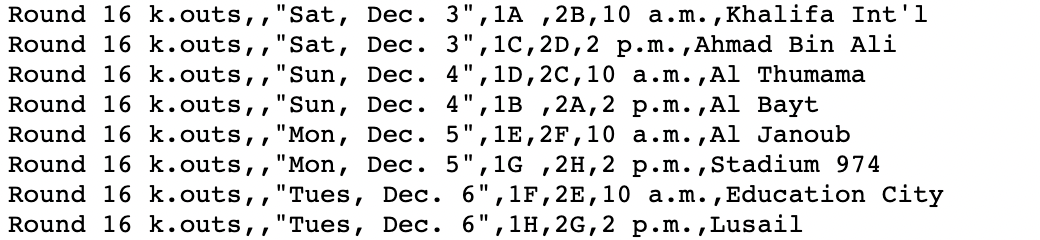

In [61]:
# Lista de partidos en los 16avos de final
grupos_16 = [('Netherlands', 'Wales'),
            ('Argentina', 'Denmark'),
            ('France', 'Mexico'),
            ('England', 'Senegal'),
            ('Spain', 'Croatia'),
            ('Brazil', 'Uruguay'),
            ('Belgium', 'Germany'),
            ('Portugal', 'Switzerland')]

### B. 16avos de Final

In [62]:
def limpiar_y_predecir(partidos, ranking_fifa, final, logreg):

    # Initialization of auxiliary list for data cleaning
    # Inicialización de lista auxiliar para limpieza de datos
    posiciones = []

    # Loop to retrieve each team's position according to FIFA ranking
    #Bucle para recuperar la posición de cada equipo según el ranking FIFA
    for partido in partidos:
        posiciones.append(ranking_fifa.loc[ranking_fifa['equipo'] == partido[0],'posicion'].iloc[0])
        posiciones.append(ranking_fifa.loc[ranking_fifa['equipo'] == partido[1],'posicion'].iloc[0])
    #print(posiciones)
    # Creating the DataFrame for prediction
    # Creamos el dataframe de las predicciones
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(posiciones):
        dict1 = {}
        # If position of first team is better, he will be the 'home' team, and vice-versa
        if posiciones[i] < posiciones[i + 1]:
            dict1.update({"torneo":1,"diferencia_goles":0.242359,'equipo_local': partidos[j][0], 'equipo_visitante': partidos[j][1]})
        else:
            dict1.update({"torneo":1,"diferencia_goles":0.242359,'equipo_local': partidos[j][1], 'equipo_visitante': partidos[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1

    #print(pred_set)

    # Convert list into DataFrame
    # Convertimos la lista en dataframe
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set


    # Get dummy variables
    # Obtenemos el dummy de las variables
    pred_set = pd.get_dummies(pred_set, prefix=['equipo_local', 'equipo_visitante'], columns=['equipo_local', 'equipo_visitante'])

    # Add missing columns compared to the model's training dataset
    # Añadimos a aquelllos que no participarán en el mundial, pero con valores 0. Es decir, no jugarán ningun partido
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    # Remove winning team column
    # Eliminamos la columna del equipo ganador
    pred_set = pred_set.drop(['equipo_ganador'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 2] + " and " + backup_pred_set.iloc[i, 3])
        if predictions[i] == 2:
            print("Winner: " + backup_pred_set.iloc[i, 2])
        elif predictions[i] == 1:
            print("Draw")
        elif predictions[i] == 0:
            print("Winner: " + backup_pred_set.iloc[i, 3])
        print('La probabilidad de que ' + backup_pred_set.iloc[i, 2] + ' Gane: ', '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
        print('La probabilidad de que  Empate: ', '{}'.format(round(logreg.predict_proba(pred_set)[i][1],10)))
        print('La probabilidad de que ' + backup_pred_set.iloc[i, 3] + ' Gane: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
        print("")


In [63]:
limpiar_y_predecir(grupos_16,ranking_clasificados,final,logreg)

Netherlands and Wales
Winner: Netherlands
La probabilidad de que Netherlands Gane:  0.663
La probabilidad de que  Empate:  0.1807842548
La probabilidad de que Wales Gane:  0.156

Argentina and Denmark
Winner: Argentina
La probabilidad de que Argentina Gane:  0.727
La probabilidad de que  Empate:  0.1501048548
La probabilidad de que Denmark Gane:  0.123

France and Mexico
Winner: France
La probabilidad de que France Gane:  0.587
La probabilidad de que  Empate:  0.2339082971
La probabilidad de que Mexico Gane:  0.179

England and Senegal
Winner: England
La probabilidad de que England Gane:  0.684
La probabilidad de que  Empate:  0.2297685196
La probabilidad de que Senegal Gane:  0.086

Spain and Croatia
Winner: Spain
La probabilidad de que Spain Gane:  0.597
La probabilidad de que  Empate:  0.2338196579
La probabilidad de que Croatia Gane:  0.169

Brazil and Uruguay
Winner: Brazil
La probabilidad de que Brazil Gane:  0.683
La probabilidad de que  Empate:  0.1946229569
La probabilidad de 

/opt/conda/bin/ipython:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


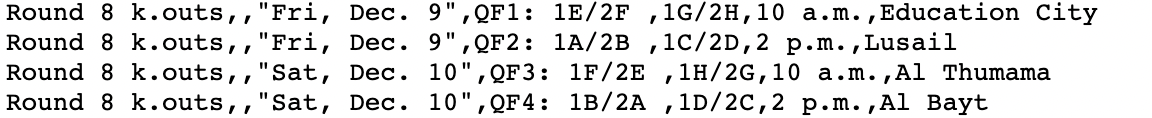

### C. Cuartos de Final

In [64]:
# List of matches
cuartos_final = [('Spain', 'Brazil'),
            ('Netherlands', 'Argentina'),
            ('Germany', 'Portugal'),
            ('England', 'France')]

In [65]:
limpiar_y_predecir(cuartos_final,ranking_clasificados,final,logreg)

Brazil and Spain
Winner: Brazil
La probabilidad de que Brazil Gane:  0.511
La probabilidad de que  Empate:  0.2846381733
La probabilidad de que Spain Gane:  0.205

Argentina and Netherlands
Winner: Argentina
La probabilidad de que Argentina Gane:  0.604
La probabilidad de que  Empate:  0.2246661571
La probabilidad de que Netherlands Gane:  0.172

Portugal and Germany
Winner: Germany
La probabilidad de que Portugal Gane:  0.334
La probabilidad de que  Empate:  0.2609653499
La probabilidad de que Germany Gane:  0.405

France and England
Winner: England
La probabilidad de que France Gane:  0.326
La probabilidad de que  Empate:  0.2770353147
La probabilidad de que England Gane:  0.397



/opt/conda/bin/ipython:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


### D. Semifinal

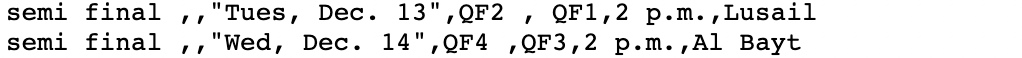

In [66]:
# List of matches
semifinal = [('Argentina', 'Brazil'),
        ('England', 'Germany')]

In [67]:
limpiar_y_predecir(semifinal,ranking_clasificados,final,logreg)

/opt/conda/bin/ipython:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Brazil and Argentina
Winner: Brazil
La probabilidad de que Brazil Gane:  0.598
La probabilidad de que  Empate:  0.2436006779
La probabilidad de que Argentina Gane:  0.159

England and Germany
Winner: England
La probabilidad de que England Gane:  0.391
La probabilidad de que  Empate:  0.2313151229
La probabilidad de que Germany Gane:  0.378



###E. Final

In [ ]:
finales = [('Brazil', 'England')]

In [ ]:
limpiar_y_predecir(finales,ranking_clasificados,final,logreg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Brazil and England
Winner: Brazil
La probabilidad de que Brazil Gane:  0.489
La probabilidad de que  Empate:  0.2714463333
La probabilidad de que England Gane:  0.239



# 6.- GRACIAS

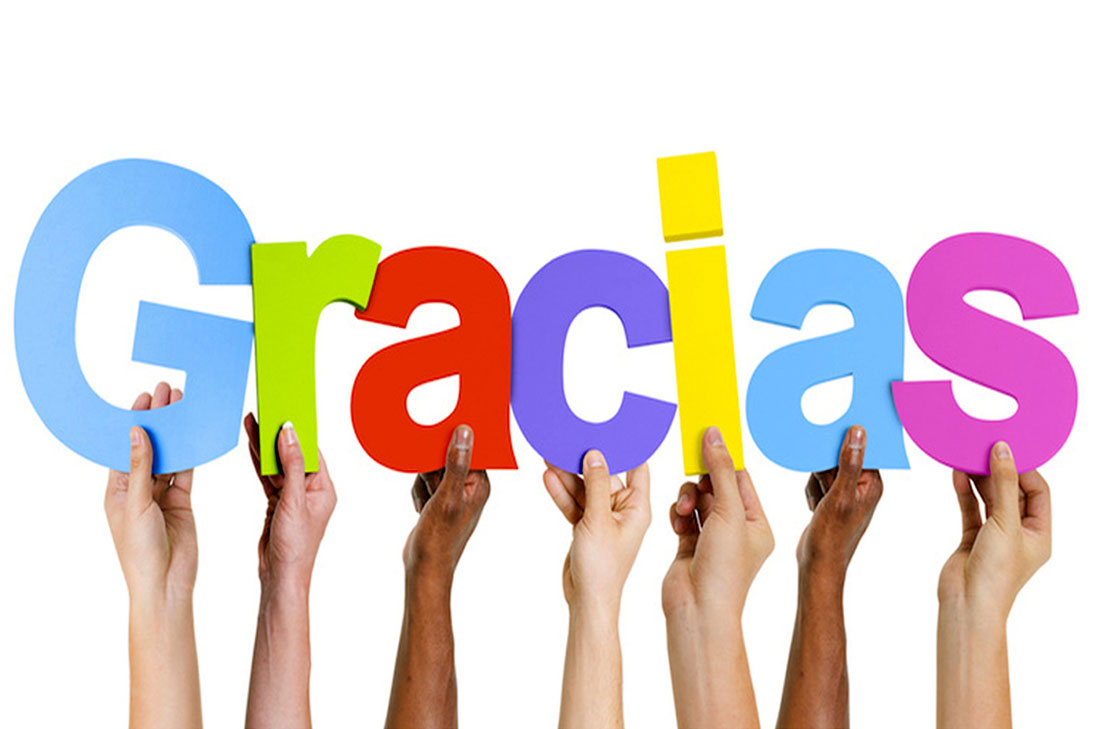